# PyTorchによる実装

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
plt.style.use('ggplot')

digits = load_digits()
X = digits.data
y = digits.target
print(X.shape, y.shape)

(1797, 64) (1797,)


In [2]:
import torch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [3]:
from torch import nn, optim

# ニューラルネットワークの形成
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

model.train()
lossfun = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

0.8141346688925988


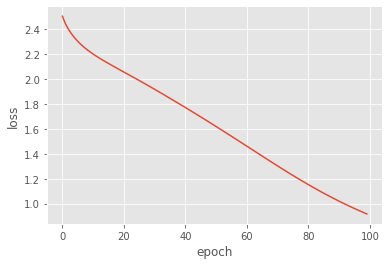

In [4]:
losses = []

for ep in range(100):
    optimizer.zero_grad()

    #　yの予測値を算出
    out = model(X)

    #　損失の計算
    loss = lossfun(out, y)
    loss.backward()

    #　勾配更新
    optimizer.step()

    losses.append(loss.item())

_, pred = torch.max(out, 1)

# 学習に用いたデータのうちどれくらいが分類に成功したか
print((pred == y).sum().item() / len(y))

plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("fig00-SGD.png")

最適化アルゴリズムをSDGからAdamにすると綺麗に分類できた

1.0


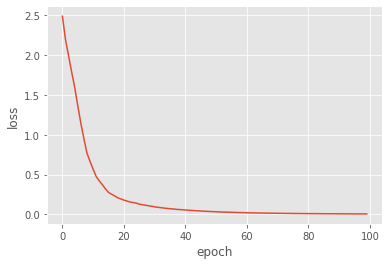

In [5]:
from torch import nn, optim

# ニューラルネットワークの形成
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

model.train()
lossfun = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

losses = []

for ep in range(100):
    optimizer.zero_grad()

    #　yの予測値を算出
    out = model(X)

    #　損失の計算
    loss = lossfun(out, y)
    loss.backward()

    #　勾配更新
    optimizer.step()

    losses.append(loss.item())


_, pred = torch.max(out, 1)

# 学習に用いたデータのうちどれくらいが分類に成功したか
print((pred == y).sum().item() / len(y))

plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("fig00-Adam.png")

毎回同じような線を描いているので、SDGよりかは安定して、制度が改善されていっており、収束段階もSDGより早い